## Netowk program

In [1]:
import random

In [86]:
class Node:
    def __init__(self, id_):
        self._id = id_
        self._group_id = 0
        self._connected_nodes = [] # the nodes that are connected to this node
        pass
    
    def setGroupID(self, g_id):
        self._group_id = g_id
        pass
    
    def getID(self):
        return self._id
    
    def connectNode(self, n_id):
        """
        n_id : id of the node that is connected to this node
        """
        self._connected_nodes.append(n_id)
        pass
    def connectNodes(self, n_ids=[]):
        """
        n_ids : list of id of the nodes that is connected to this node
        """
        self._connected_nodes.append(n_ids)
        pass
    
    def degree(self):
        return len(self._connected_nodes)
    
    def view(self):
#         print("id ", self._id)
#         print("group id ", self._group_id)
#         print("connected nodes ", self._connected_nodes)
        print(self._id, ":", len(self._connected_nodes), ":", self._connected_nodes)
        pass
    
    def __str__(self):
        """
        (id, group_id)
        """
        return "({},{})".format(self._id, self._group_id)

In [3]:
class Link:
    def __init__(self, id_a, id_b):
        self._id_a, self._id_b = (id_a, id_b) if id_a < id_b else (id_b, id_a)
        self._group_id = 0
        
        pass
    def setGroupID(self, g_id):
        self._group_id = g_id
        pass
    
    def view(self):
        print("group id ", self._group_id)
        print("id (", self._id_a, ",", self._id_b, ")")
        pass
    
    def getGroupID(self):
        return self._group_id
    
    def __str__(self):
        """
        return format : <(id_a, id_b)> or <group_id(id_a, id_b)>
        """
#         return "<({},{})>".format(self._id_a, self._id_b)
        return "<{}({},{})>".format(self._group_id, self._id_a, self._id_b)

In [150]:
class Network:
    def __init__(self, seed=3):
        # variables that must be reseted for a new network
        print("Network")
        self.nodes = []
        self.links = []
        self.node_counter=0
        self.total_degree = 0
        
        self.seed = seed
#         print(seed)
        self.__initialize()
        pass
    
    def __initialize(self):
         ## initialize network with seed
        for i in range(self.seed):
            self.nodes.append(Node(self.node_counter))
            self.node_counter += 1
            pass
#         print(len(self.nodes))
        for i in range(self.seed):
            id_a = i
            id_b = (i+1) % self.seed 
#             print(id_a, ' ', id_b)
            self.total_degree += 2 # one unique link increases degree by 2
            self.links.append(Link(id_a, id_b))
            self.nodes[id_a].connectNode(id_b)
            self.nodes[id_b].connectNode(id_a)
            pass
        
    def reset(self):
        self.nodes = []
        self.links = []
        self.node_counter=0
        self.total_degree = 0
        self.__initialize()
    
    def addNode(self):
        self.nodes.append(Node(self.node_counter))
        self.node_counter += 1
        pass
    
    def growNetwork(self, size):
        """
        add additional 'size' nodes but not connecting them
        """
        for i in range(size):
            self.addNode()
    
    def connectNodes(self, id_a, id_b):
        if id_a > self.node_counter and id_b > self.node_counter:
            print("specified node(s) does not exists")
            return -1
        if id_a == id_b:
            print("self linking is not allowed")
            return -2
        if id_a < 0 or id_b < 0:
            print("nodes cannot have negative value")
            return -3
        self.links.append(Link(id_a, id_b))
        self.nodes[id_a].connectNode(id_b)
        self.nodes[id_b].connectNode(id_a)
        
    def connectNodesList(self, id_a_list, id_b_list):
        print(id_a_list)
        print(id_b_list)
        for id_a in id_a_list:
            id_b = id_b_list[id_a]
            self.connectNodes(id_a, id_b)
            pass
        pass
    
    def getDegree(self, id_):
        if id_ < self.node_counter:
            return len(self.nodes[id_])
        print("out of range")
        return -1
    
    def view_nodes(self):
        print("id of current node : degree : [list of connected nodes]")
        for n in self.nodes:
            n.view()
            
            pass
        pass
    
    def networkSize(self):
        return len(self.nodes)
        
            

In [156]:
class NetworkBA_slow(Network):
    """
    The more degree a node have, the more it is likely to be connected to the new nodes.
    """
    def __init__(self, m0, m):
        print("NetworkBA_slow")
        self.m0 = m0 if m0>m else m*2 # seed
        self.m = m # link count for new nodes
        super().__init__(m0)
        
        pass
    
    def reset(self):
        super().reset()
        super().__init__(self.m0)
        pass
    
    def select_one_node_preferentially(self):
        p = random.random()
        print("p = ", p)
        tmp = 0
        for n in self.nodes:
            tmp += n.degree() / self.total_degree
            print("tmp = ", tmp)
            if tmp >= p:
                # add new node to this node
                id_ = n.getID()
                return id_
            pass
        pass
    
    def select_m_node_preferentially(self):
        selected = []
        while len(selected) < self.m:
            p = random.random()
            tmp = 0
            for n in self.nodes:
                tmp += n.degree() / self.total_degree
                if tmp >= p:
                    # add new node to this node
                    id_ = n.getID()
                    if id_ not in selected:
                        selected.append(id_)
                        break
                        pass
                        
                    pass
                pass
            pass
#         print(selected)
        return selected
        
    
    def addNode(self):
        # add new node and connect it to the other nodes preferentially
        selected = self.select_m_node_preferentially()
        self.nodes.append(Node(self.node_counter))
        for s in selected:
            # connect with m nodes
            self.links.append(Link(self.node_counter, s))
            self.nodes[self.node_counter].connectNode(s)
            self.nodes[s].connectNode(self.node_counter)
            self.total_degree += 2
            pass
        self.node_counter += 1
        pass
    
    def getDegrees(self):
        degrees = []
        for n in self.nodes:
            degrees.append(n.degree())
            pass
        return degrees

In [363]:
class NetworkBA(Network):
    """
        Degree of a node is the number of times it appears in the self.preferentially list.
        So that, by just selecting randomly from that list we effectively do the 
        preferential attachment and make the process far more efficient.
    """
    def __init__(self, m0, m):
        print("NetworkBA")
        self.m0 = m0 if m0 > m else m*2 # seed
        self.m = m # link count for new nodes
        super().__init__(m0)
        self.preferentially = []
        for n in self.nodes:
            d = n.degree()
            a = [n.getID()] * d
            self.preferentially.extend(a)
#             print(a)
#             print(n.getID(), d)
            pass
#         print("preferentially list ")
#         print(self.preferentially)
        pass
    
    def reset(self):
        super().reset()
        self.__init__(self.m0, self.m)
        pass
    
    def select_one_node_preferentially(self):
#         print(self.preferentially)
        i = random.randint(0, len(self.preferentially)-1)
        id_ = self.preferentially[i]
        return id_
    
    def select_m_node_preferentially(self):
        selected = []
        while len(selected) < self.m:
            i = random.randint(0, len(self.preferentially)-1)
            id_ = self.preferentially[i]
            if id_ not in selected:
                selected.append(id_)
                pass
            pass
#         print(selected)
        return selected
        
    
    def addNode(self):
        # add new node and connect it to the other nodes preferentially
        # 1. create a new node
        # 2. select m node from preferentially list
        # 3. connect with them
        # 4. update preferentially list
        
        # add new node and connect it to the other nodes preferentially
        selected = self.select_m_node_preferentially()
        self.nodes.append(Node(self.node_counter))
        for s in selected:
            # connect with m nodes
            self.links.append(Link(self.node_counter, s))
            self.nodes[self.node_counter].connectNode(s)
            self.nodes[s].connectNode(self.node_counter)
            
            self.preferentially.append(s) # adding old node to preferentially
            self.total_degree += 2
            pass
        
        pass
    
        a = [self.node_counter] * self.m # since m new links
        self.preferentially.extend(a) # adding new node m times to preferentially
        self.node_counter += 1
        pass
    
    def getDegrees(self):
        degrees = []
        for n in self.nodes:
            degrees.append(n.degree())
            pass
        return degrees

In [364]:
net = NetworkBA(4, 3)

preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3]


In [365]:
net.view_nodes()

id of current node : degree : [list of connected nodes]
0 : 2 : [1, 3]
1 : 2 : [0, 2]
2 : 2 : [1, 3]
3 : 2 : [2, 0]


In [337]:
# for  i in range(100):
#     net.addNode()

In [338]:
net.view_nodes()

id of current node : degree : [list of connected nodes]
0 : 2 : [1, 3]
1 : 2 : [0, 2]
2 : 2 : [1, 3]
3 : 2 : [2, 0]


In [339]:
net.select_one_node_preferentially()

2

In [340]:
net.select_m_node_preferentially()

[0, 3, 2]

In [341]:
for  i in range(100):
    net.addNode()
net.view_nodes()

id of current node : degree : [list of connected nodes]
0 : 10 : [1, 3, 4, 6, 10, 18, 38, 48, 52, 81]
1 : 8 : [0, 2, 4, 5, 12, 58, 63, 76]
2 : 7 : [1, 3, 5, 7, 12, 14, 34]
3 : 10 : [2, 0, 4, 5, 6, 17, 25, 37, 62, 83]
4 : 12 : [1, 0, 3, 8, 13, 21, 24, 26, 30, 75, 93, 95]
5 : 15 : [1, 3, 2, 6, 7, 9, 13, 19, 21, 25, 27, 60, 69, 86, 91]
6 : 16 : [5, 3, 0, 7, 8, 11, 15, 18, 19, 20, 28, 30, 36, 45, 55, 56]
7 : 12 : [5, 2, 6, 8, 9, 11, 16, 42, 47, 56, 79, 87]
8 : 9 : [7, 4, 6, 9, 10, 12, 15, 16, 62]
9 : 8 : [5, 8, 7, 10, 19, 35, 54, 92]
10 : 11 : [8, 9, 0, 11, 13, 21, 24, 31, 32, 45, 76]
11 : 9 : [6, 7, 10, 14, 23, 43, 50, 62, 74]
12 : 7 : [2, 8, 1, 16, 17, 27, 44]
13 : 10 : [10, 4, 5, 14, 20, 22, 34, 38, 39, 54]
14 : 9 : [2, 11, 13, 15, 17, 40, 46, 49, 68]
15 : 7 : [14, 6, 8, 28, 33, 67, 89]
16 : 9 : [12, 7, 8, 18, 29, 31, 49, 64, 86]
17 : 6 : [14, 12, 3, 36, 66, 85]
18 : 8 : [16, 6, 0, 29, 33, 43, 70, 74]
19 : 7 : [9, 5, 6, 20, 48, 52, 101]
20 : 8 : [6, 19, 13, 22, 23, 25, 41, 64]
21 : 10 :

In [342]:
import numpy as np

    

In [343]:
def degree_distribution(net, size=100000):
    """
        net : a network object
        size : size of the network
        returns : [degree, relative_count]
    """
    for  i in range(size):
            net.addNode()
            pass
    degrees = net.getDegrees()
    
#     net.view_nodes()
    sm = sum(degrees)
    uniques = np.unique(degrees, return_counts=True)
#     print(net.networkSize())
#     print(uniques)
    degrees = uniques[0]
    counts = uniques[1] / net.networkSize()
    return np.c_[degrees, counts]

In [344]:
def degree_distribution_ens(net, size=100000, ensemble=100):
    """
    returns : degrees, ensemble
        The index of degrees are the degree of a node and the value is the number of times that degree appears.
        Divide by network size each element of degrees to get the degree distribution. Remove the zeros while write to a file.
        
    """
    degree_count = [0]
    for e in range(ensemble):
        print("ensemble ", e)
        net.reset()
        for  i in range(size):
            net.addNode()
            pass
        degrees = net.getDegrees()
#         print(degrees)
        for i in degrees:
            if i >= len(degree_count):
                tmp = [0] * i
                degree_count.extend(tmp)
            degree_count[i] += 1
            pass
        pass
#     print(net.networkSize())
    for i in range(len(degree_count)):
        degree_count[i] /= (ensemble * net.networkSize())
        pass
    degs = list(range(len(degree_count)))
#     print(degs)
#     print(degree_avg)
#     column 0 = degree
    # column 1 = relative number of times that degree appears
    a = np.c_[degs, degree_count]
    return a[a[:,1] != 0]

In [401]:
a = degree_distribution_ens(NetworkBA(3, 10), 1000, 1)
# a = degree_distribution(NetworkBA_slow(3, 2), 10000)

preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  0
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19]


In [402]:
a

array([[7.00000000e+00, 9.80392157e-04],
       [1.00000000e+01, 1.48039216e-01],
       [1.10000000e+01, 1.20588235e-01],
       [1.20000000e+01, 1.07843137e-01],
       [1.30000000e+01, 7.64705882e-02],
       [1.40000000e+01, 6.27450980e-02],
       [1.50000000e+01, 6.56862745e-02],
       [1.60000000e+01, 4.50980392e-02],
       [1.70000000e+01, 3.72549020e-02],
       [1.80000000e+01, 3.03921569e-02],
       [1.90000000e+01, 2.84313725e-02],
       [2.00000000e+01, 3.03921569e-02],
       [2.10000000e+01, 1.47058824e-02],
       [2.20000000e+01, 1.56862745e-02],
       [2.30000000e+01, 1.86274510e-02],
       [2.40000000e+01, 1.07843137e-02],
       [2.50000000e+01, 1.17647059e-02],
       [2.60000000e+01, 1.47058824e-02],
       [2.70000000e+01, 1.37254902e-02],
       [2.80000000e+01, 1.27450980e-02],
       [2.90000000e+01, 6.86274510e-03],
       [3.00000000e+01, 3.92156863e-03],
       [3.10000000e+01, 2.94117647e-03],
       [3.20000000e+01, 8.82352941e-03],
       [3.300000

In [361]:
import matplotlib.pyplot as plt

preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  0
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  1
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  2
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  3
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  4
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  5
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  6
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  7
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  8
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  9
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  10
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  11
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  12
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  13
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  14
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  15
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  16
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  17
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  18
pre

/home/shahnoor/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


ensemble  5
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  6
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  7
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  8
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  9
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  10
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  11
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  12
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  13
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  14
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  15
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  16
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  17
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  18
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  19
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  20
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  21
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  22
preferentially list 
[0, 0, 1, 1, 2, 2]
ensemble  23
preferentially list 
[0, 0, 1, 1, 2, 2

ensemble  41
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  42
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  43
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  44
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  45
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  46
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  47
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  48
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  49
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  50
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  51
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ensemble  52
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]
ense

ensemble  30
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  31
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  32
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  33
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  34
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  35
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  36
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  37
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
ensemble  38
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11]
e

ensemble  6
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  7
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  8
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  9
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  10
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  11
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  12
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ens

ensemble  66
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  67
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  68
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  69
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  70
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  71
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]
ensemble  72
preferentially list 
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15]

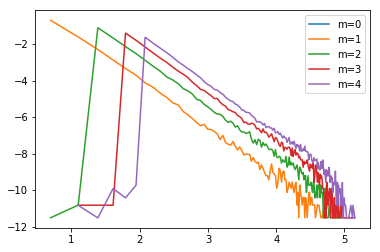

In [377]:
for m in range(5):
    a = degree_distribution_ens(NetworkBA(3, 2*m), 1000, 100)
    # plt.plot(a[:,0], a[:,1])
    plt.plot(np.log(a[:,0]), np.log(a[:,1]), label='m={}'.format(m))
    pass
plt.legend()

In [ ]:
import scipy.stats as stat